#### SIFT feature matching Example - 210293K

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('store/store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)
assert image is not None
template = cv.imread('store/oat_crunch.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template is not None

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(image, None)
kp2, des2 = sift.detectAndCompute(template, None)

In [2]:
print(f"Number of keypoints in first image: {len(kp1)}")
print(f"Number of keypoints in second image: {len(kp2)}")


Number of keypoints in first image: 2409
Number of keypoints in second image: 5864


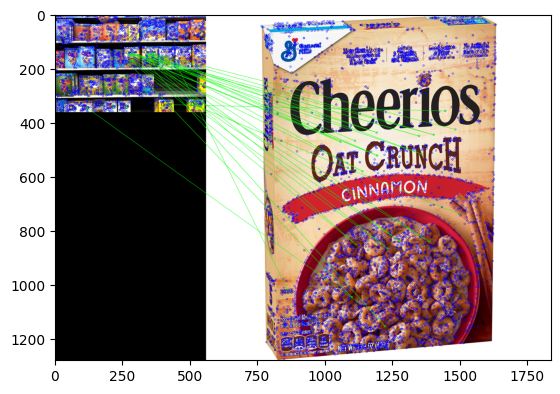

In [3]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

#Creating a mask to draw only good matches
matchesMask = [[0,0] for i in range(len(matches))]
#As per Lowe's ratio test
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

dra_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = cv.DrawMatchesFlags_DEFAULT) 

img3 = cv.drawMatchesKnn(image, kp1, template, kp2, matches, None, **dra_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()

#### New example using two different photos

In [12]:
imageNew = cv.imread('store/team.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert imageNew is not None
templateNew = cv.imread('store/player.jpeg', cv.IMREAD_REDUCED_COLOR_2)
assert templateNew is not None

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(imageNew, None)
kp2, des2 = sift.detectAndCompute(templateNew, None)

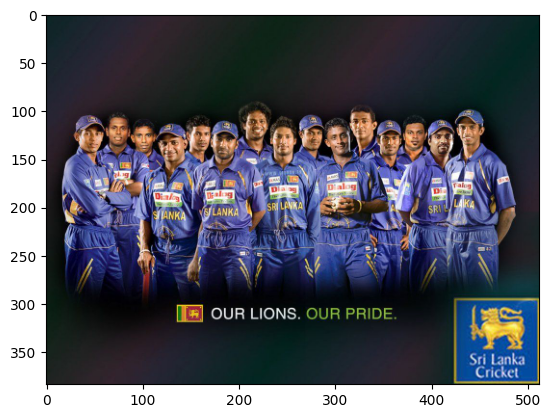

In [17]:
plt.imshow(cv.cvtColor(imageNew, cv.COLOR_BGR2RGB))


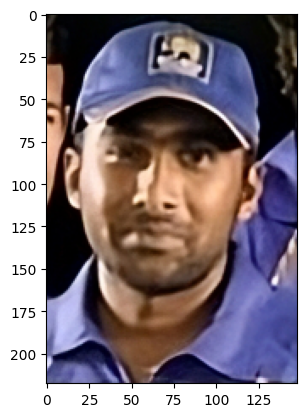

In [18]:
plt.imshow(cv.cvtColor(templateNew, cv.COLOR_BGR2RGB))

In [13]:
print(f"Number of keypoints in first image: {len(kp1)}")
print(f"Number of keypoints in second image: {len(kp2)}")


Number of keypoints in first image: 1607
Number of keypoints in second image: 290


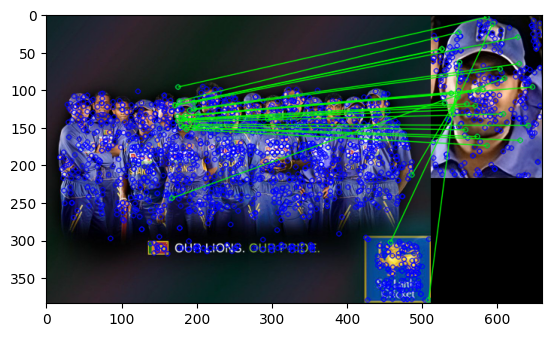

In [14]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

#Creating a mask to draw only good matches
matchesMask = [[0,0] for i in range(len(matches))]
#As per Lowe's ratio test
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

dra_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = cv.DrawMatchesFlags_DEFAULT) 

img3 = cv.drawMatchesKnn(imageNew, kp1, templateNew, kp2, matches, None, **dra_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()